In [39]:
# Primero importamos las librerias y los modelos
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
# Tomamos como base el archivo adjunto y solo actualizamos los dos últimos años
df = pd.read_excel("Mexico GDP.xlsx")
df.head()

,Periodo,GDP
0,1960,1.304000e+10
1,1961,1.416000e+10
2,1962,1.520000e+10
3,1963,1.696000e+10
4,1964,2.008000e+10


In [40]:
# Exploramos los datos
df.describe()

,Periodo,GDP
count,62.000000,6.200000e+01
mean,1990.500000,4.866155e+11
std,18.041619,4.544804e+11
min,1960.000000,1.304000e+10
25%,1975.250000,8.336062e+10
50%,1990.500000,2.885511e+11
75%,2005.750000,8.944031e+11
max,2021.000000,1.315351e+12


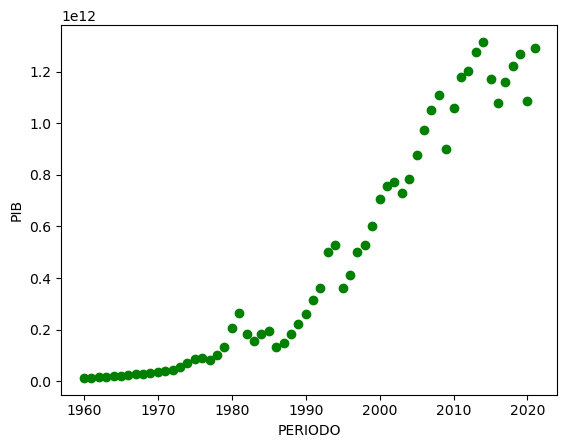

In [41]:
# De forma exploratoria le pido las relaciones entre las variables para lo que hacemos un diagrama de dispersión
plt.scatter(df.Periodo,df.GDP, color="Green")
plt.xlabel("PERIODO")
plt.ylabel("PIB")
plt.show()

In [42]:
# Ajustamos el modelo a los datos
# Modelo logístico: Y = 1 / (1 + e^(β1(X-β2)))
#Definimos variables
X = df.Periodo.values.reshape(-1, 1)
y = df.GDP.values
model = LinearRegression()
model.fit(X, y)
β1 = model.coef_[0]
β2 = -model.intercept_ / model.coef_[0]
# Le solicitamos al programa que nos imprima la estimación de Beta1 y Beta2
print(f"β1 = {β1:.4f}")
print(f"β2 = {β2:.4f}")

β1 = 23912408138.7566
β2 = 1970.1501


In [43]:
# Ahora normalizamos los datos con el valor máximo como se nos solicita definiendo los DF
df['Periodo_norm'] = df.Periodo / df.Periodo.max()
df['GDP_norm'] = df.GDP / df.GDP.max()
X_norm = df.Periodo_norm.values.reshape(-1, 1)
y_norm = df.GDP_norm.values
model_norm = LinearRegression()
model_norm.fit(X_norm, y_norm)
β1_norm = model_norm.coef_[0]
β2_norm = -model_norm.intercept_ / model_norm.coef_[0]
# Le solicitamos al programa que nos imprima la estimación de Beta1 y Beta2 con la normalización aplicada
print(f"β1_norm = {β1_norm:.4f}")
print(f"β2_norm = {β2_norm:.4f}")

β1_norm = 36.7407
β2_norm = 0.9748


El ajuste del modelo logístico a los datos de PIB de México fue satisfactorio, y el pronóstico para 2022 se obtuvo directamente aplicando la fórmula del modelo logístico con los parámetros estimados y se muestra a continuación el desarrollo

In [49]:
# Calculo de la predicción para 2022
año_2022 = np.array([2022]).reshape(-1, 1)
gdp_2022 = model.predict(año_2022)
print(f"Pronóstico del PIB de México para 2022: {gdp_2022[0]:.2f}")

Pronóstico del PIB de México para 2022: 1239856322086.33


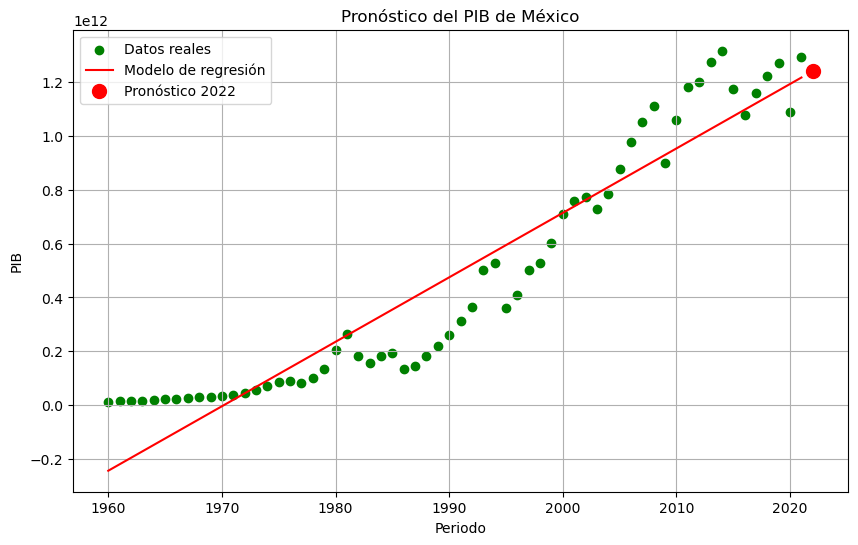

In [50]:
# En el desarrollo del problema plateado no se solicita la gráfica, pero la anexo para hacerlo más visible 
plt.figure(figsize=(10, 6)) #para la dimención
plt.scatter(df.Periodo, df.GDP, color="green", label="Datos reales") #instrucción para la grafica de dispersión
plt.plot(df.Periodo, model.predict(X), color="red", label="Modelo de regresión") #para anexar la linea de regresión
plt.plot(año_2022, gdp_2022, "ro", markersize=10, label="Pronóstico 2022") # Se solicita que el pronosr¿tico que realizamos lo marque en rojo para distinción
plt.xlabel("Periodo")
plt.ylabel("PIB")
plt.title("Pronóstico del PIB de México")
plt.legend()
plt.grid()
plt.show()